Q 1 - remove vowels from a string

In [6]:
def remove_vowels(s):
    vowels = {'a','e','i','o','u'}
    s2 = ''
    for c in s:
        if c not in vowels:
            s2 += c
    return s2


'bcd'

What if we want to do the above in-place?
we would want to use a moving pointer. start at the top of the string and 

In [54]:
def remove_vowels(s):
    vowels = {'a','e','i','o','u'}
    i = 0
    j = 0
    for c in s:
        if c not in vowels:
            s = s[:j] + c
            j += 1
    
    return s[:j]

remove_vowels('abcefesdd')

'bcfsdd'

Q2 - change the first letter of a string inplace

In [7]:
def change_first_letter(s):
    return 'k'+s[1:]

change_first_letter('Ajey')

'kjey'

Generate pareto distribution, plot pdf. Create a bootstrapped sample from a pareto distribution. How many samples do you need before CLT kicks in?

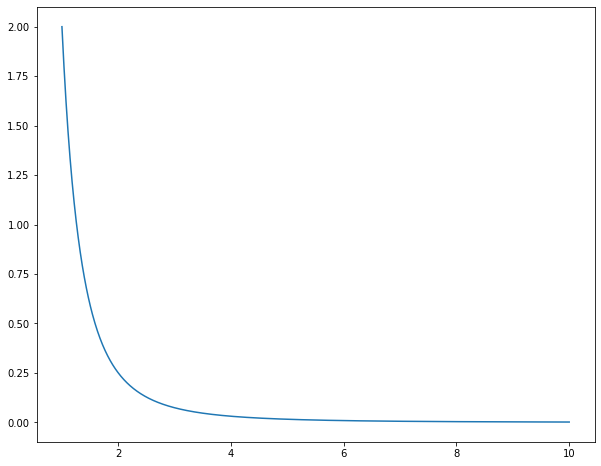

In [13]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

p = scipy.stats.pareto(2)
xvals = np.linspace(1,10,1000)
p_pdf = p.pdf(xvals)

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(xvals,p_pdf)
plt.show()

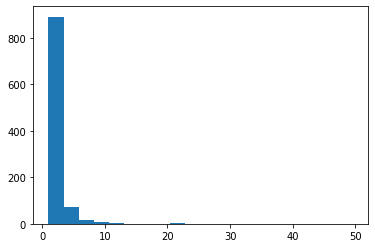

In [15]:
sample = p.rvs(1000)
plt.hist(sample,20)
plt.show()

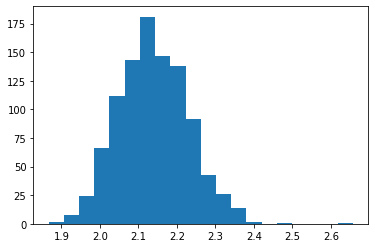

NormaltestResult(statistic=29.288874448938756, pvalue=4.3651756389001346e-07)


In [24]:
means = []
for iter in range(1000):
    curr_sample = np.random.choice(sample,1000,replace=True)
    means.append(np.mean(curr_sample))
    
plt.hist(means,20)
plt.show()

In [47]:
means = []
for var_iter in range(10,200):
    for iter in range(var_iter):
        curr_sample = np.random.choice(sample,1000,replace=True)
        means.append(np.mean(curr_sample))
    k = scipy.stats.normaltest(means)
    if k[1] < 0.005:
        print (f'CLT holds at num samples = {var_iter}')
        break
print()

CLT holds at num samples = 38



C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Write code to test whether the mean is > 2, not equal to 2
Depends on number of samples. Let's assume we do not know the population statistic. 

In [48]:
ttest = scipy.stats.ttest_1samp(means,2)
ttest


Ttest_1sampResult(statistic=38.57786828333898, pvalue=6.528990121454015e-175)